In [236]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

from sklearn.datasets import fetch_california_housing
import warnings
from warnings import filterwarnings

In [152]:
housing = fetch_california_housing()

In [153]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

# Creating DF

In [154]:
df= pd.DataFrame(housing.data,columns=housing.feature_names)
df['TARGET']=housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# EDA

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   TARGET      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [156]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Found Outliers IN :-
1.HouseAge 2.AveRooms 3.AveBedrms 4.Population 5.AveOccup

# FEATURE ENGINEERING

# Checking Null values and Datatypes of Features

In [157]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
TARGET        0
dtype: int64

# Treating Outliers

<Axes: >

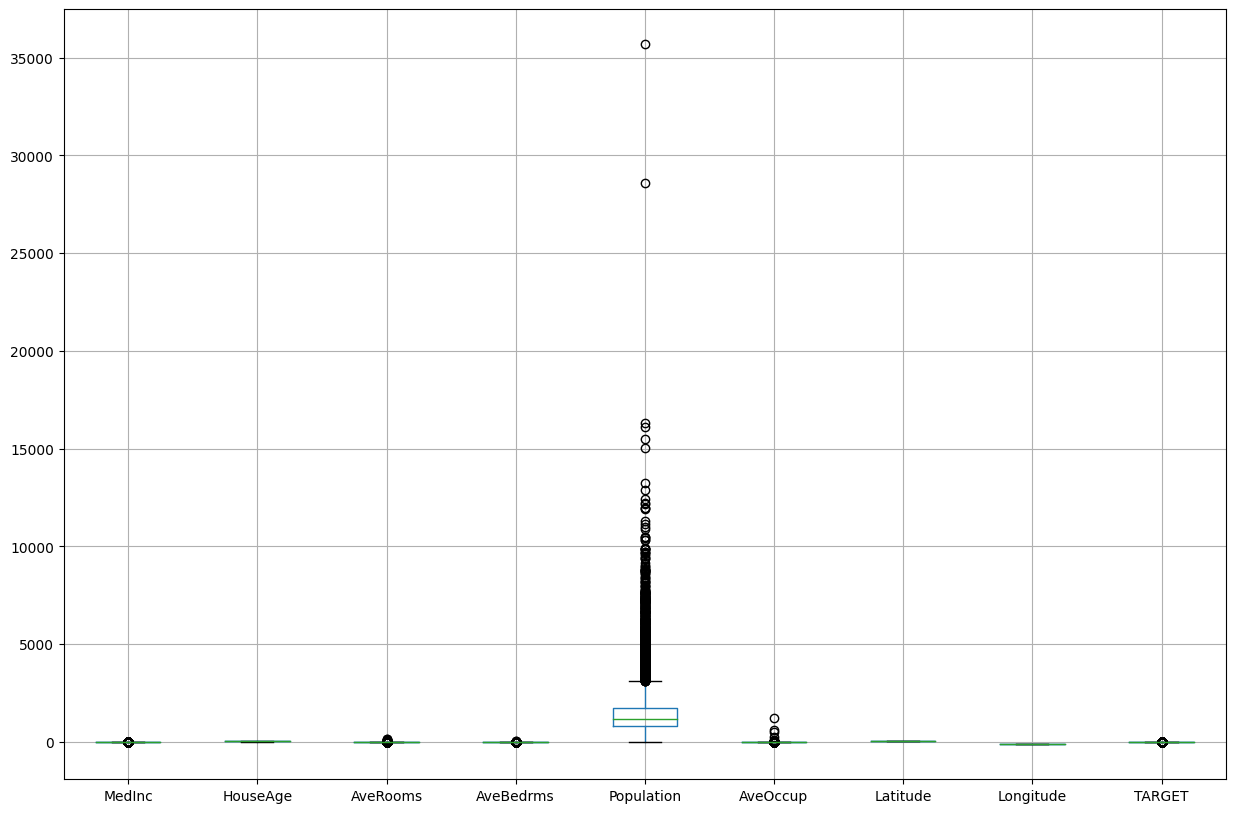

In [158]:
plt.figure(figsize=(15,10))
df.boxplot()# another method-- only 'boxplot'other than 'sns.boxplot'

# 1. Treating Average Rooms Feature

<Axes: xlabel='AveRooms'>

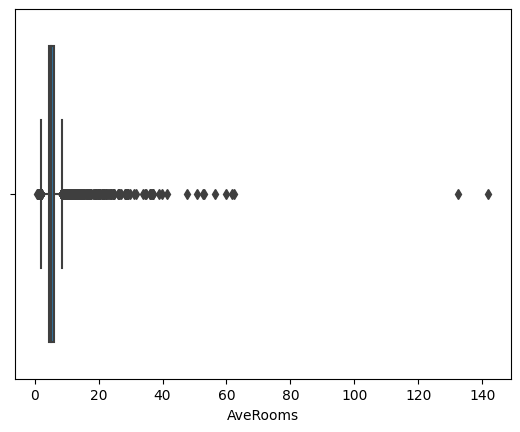

In [159]:
sns.boxplot(x = df["AveRooms"])# sns.boxplot has horizontal representation.

# IQR Method

In [160]:
q1 = df["AveRooms"].quantile(0.25)
q2 = df["AveRooms"].quantile(0.50)
q3 = df["AveRooms"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  1.6116647164839932
UpperTail : 8.469878027106942
Lower Tail :  2.023219161170969


# Imputing Upper tail

In [161]:
df["AveRooms"] = np.where(df["AveRooms"] > upper_tail,upper_tail,df["AveRooms"])

<Axes: xlabel='AveRooms'>

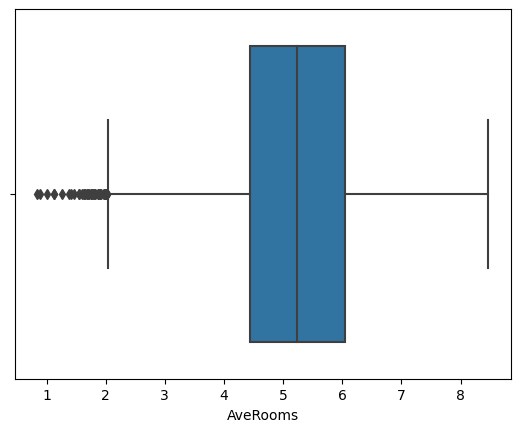

In [162]:
sns.boxplot(x = df["AveRooms"]) # solved Problem of Upper Limit

# Imputing Lower Tail

In [163]:
df["AveRooms"] = np.where(df["AveRooms"] < lower_tail,lower_tail,df["AveRooms"])

<Axes: xlabel='AveRooms'>

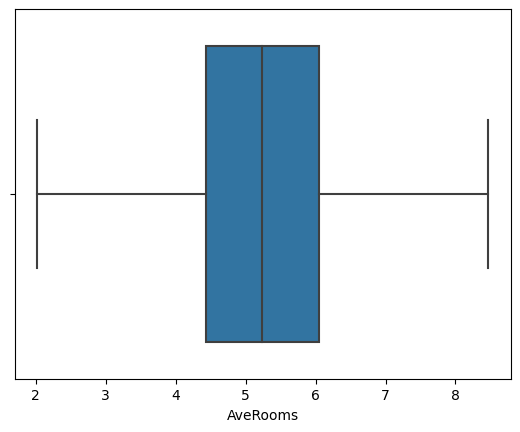

In [164]:
sns.boxplot(x = df["AveRooms"]) # # solved Problem of Lower Limit

# 2. Treating Average Bed Rooms Feature

<Axes: xlabel='AveBedrms'>

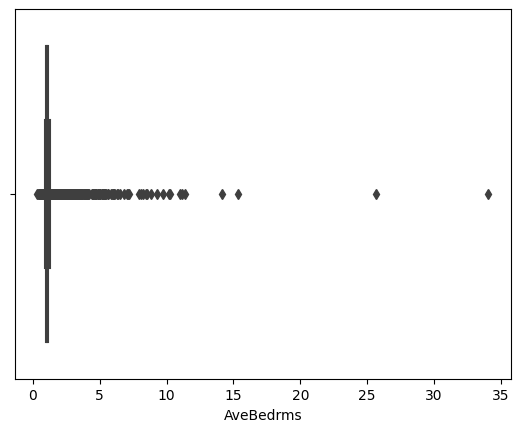

In [165]:
sns.boxplot(x = df["AveBedrms"])# sns.boxplot has horizontal representation.

In [166]:
q1 = df["AveBedrms"].quantile(0.25)
q2 = df["AveBedrms"].quantile(0.50)
q3 = df["AveBedrms"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  0.09344702031223284
UpperTail : 1.2396965968190603
Lower Tail :  0.8659085155701288


# Imputing Upper tail

In [167]:
df["AveBedrms"] = np.where(df["AveBedrms"] > upper_tail,upper_tail,df["AveBedrms"])

<Axes: xlabel='AveBedrms'>

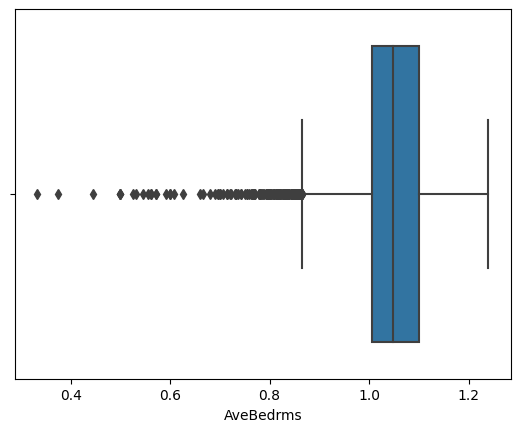

In [168]:
sns.boxplot(x = df["AveBedrms"]) # solved Problem of Upper Limit

# Imputing Lower Tail

In [169]:
df["AveBedrms"] = np.where(df["AveBedrms"] < lower_tail,lower_tail,df["AveBedrms"])

<Axes: xlabel='AveRooms'>

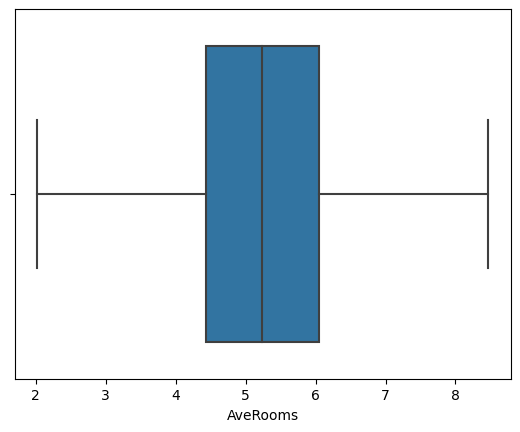

In [170]:
sns.boxplot(x = df["AveRooms"]) # # solved Problem of Lower Limit

# 3. Treating Average Occupency Rooms Feature

<Axes: xlabel='AveOccup'>

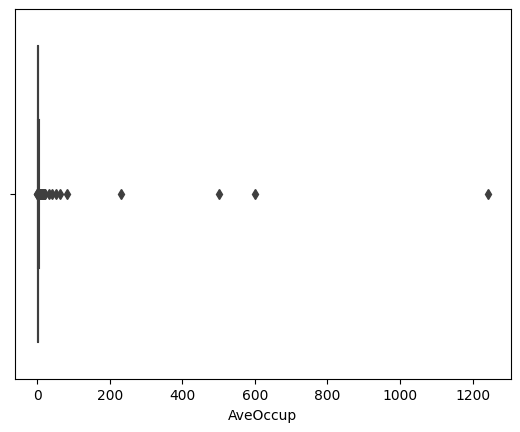

In [171]:
sns.boxplot(x = df["AveOccup"])# Visualizing Outliers

In [172]:
q1 = df["AveOccup"].quantile(0.25)
q2 = df["AveOccup"].quantile(0.50)
q3 = df["AveOccup"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  0.8525197767200461
UpperTail : 4.5610405893536905
Lower Tail :  1.1509614824735064


# Imputing Upper tail

In [173]:
df["AveOccup"] = np.where(df["AveOccup"] > upper_tail,upper_tail,df["AveOccup"])

<Axes: xlabel='AveOccup'>

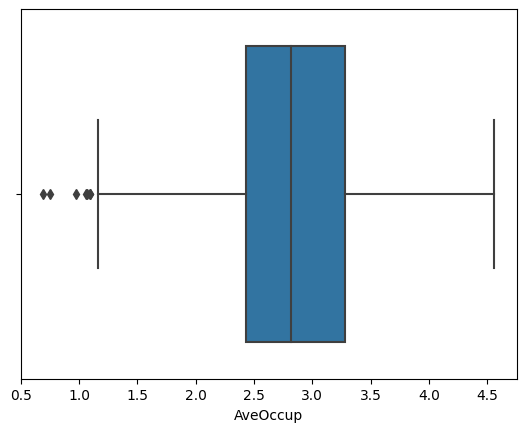

In [174]:
sns.boxplot(x = df["AveOccup"]) # solved Problem of Upper Limit

# Imputing Lower Tail

In [175]:
df["AveOccup"] = np.where(df["AveOccup"] < lower_tail,lower_tail,df["AveOccup"])

<Axes: xlabel='AveOccup'>

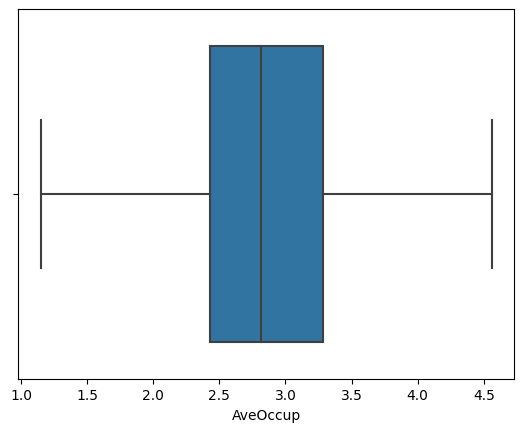

In [176]:
sns.boxplot(x = df["AveOccup"]) # solved Problem of Lower Limit

<Axes: xlabel='Population'>

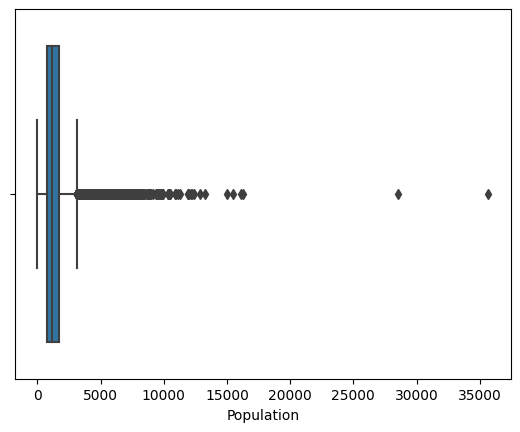

In [177]:
sns.boxplot(x = df["Population"])

In [178]:
q1 = df["Population"].quantile(0.25)
q2 = df["Population"].quantile(0.50)
q3 = df["Population"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 3 * iqr
lower_tail = q1 - 1.5 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  938.0
UpperTail : 4539.0
Lower Tail :  -620.0


# Imputing Upper tail

In [179]:
df["Population"] = np.where(df["Population"] > upper_tail,upper_tail,df["Population"])

<Axes: xlabel='Population'>

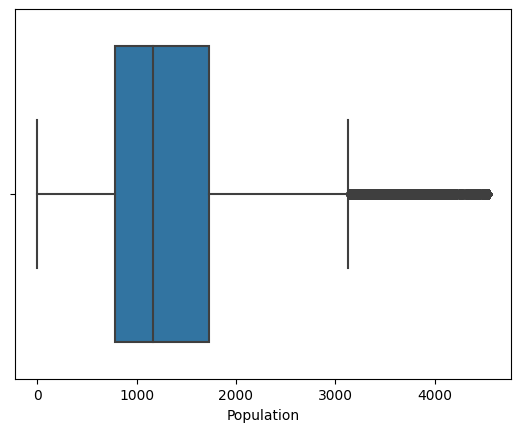

In [180]:
sns.boxplot(x = df["Population"])# solved Problem of Upper Limit

In [181]:
df["Population"] = np.where(df["Population"] < q1 ,q1,df["Population"])

<Axes: xlabel='Population'>

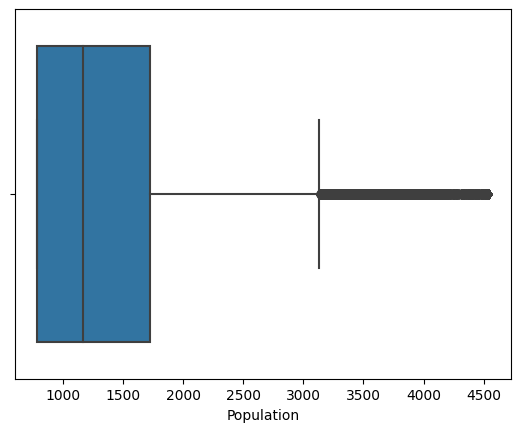

In [182]:
sns.boxplot(x = df["Population"])

# Checking Relationship Between Dependent  and Independent Variables

# 1. Linearity

In [183]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
MedInc,1.000000,-0.119034,0.648751,-0.209465,-0.007668,-0.060625,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.230360,-0.132477,-0.322497,-0.006318,0.011173,-0.108197,0.105623
AveRooms,0.648751,-0.230360,1.000000,0.176210,-0.072454,-0.035624,0.128647,-0.068379,0.311003
AveBedrms,-0.209465,-0.132477,0.176210,1.000000,0.023180,-0.121060,0.063221,0.011850,-0.096055
Population,-0.007668,-0.322497,-0.072454,0.023180,1.000000,0.205491,-0.113046,0.105774,-0.032635
AveOccup,-0.060625,-0.006318,-0.035624,-0.121060,0.205491,1.000000,-0.170149,0.178649,-0.281148
Latitude,-0.079809,0.011173,0.128647,0.063221,-0.113046,-0.170149,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.068379,0.011850,0.105774,0.178649,-0.924664,1.000000,-0.045967
TARGET,0.688075,0.105623,0.311003,-0.096055,-0.032635,-0.281148,-0.144160,-0.045967,1.000000


In [184]:
df.var()

MedInc             3.609323
HouseAge         158.396260
AveRooms           1.552956
AveBedrms          0.006472
Population    705472.517657
AveOccup           0.477678
Latitude           4.562293
Longitude          4.014139
TARGET             1.331615
dtype: float64

<Axes: >

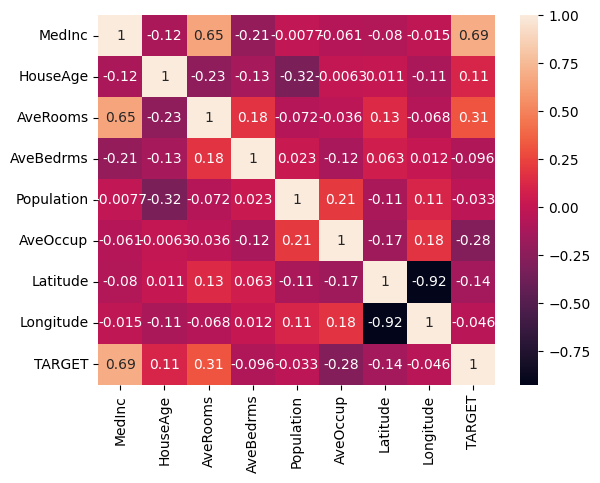

In [185]:
sns.heatmap(df.corr(),annot= True)

<Axes: >

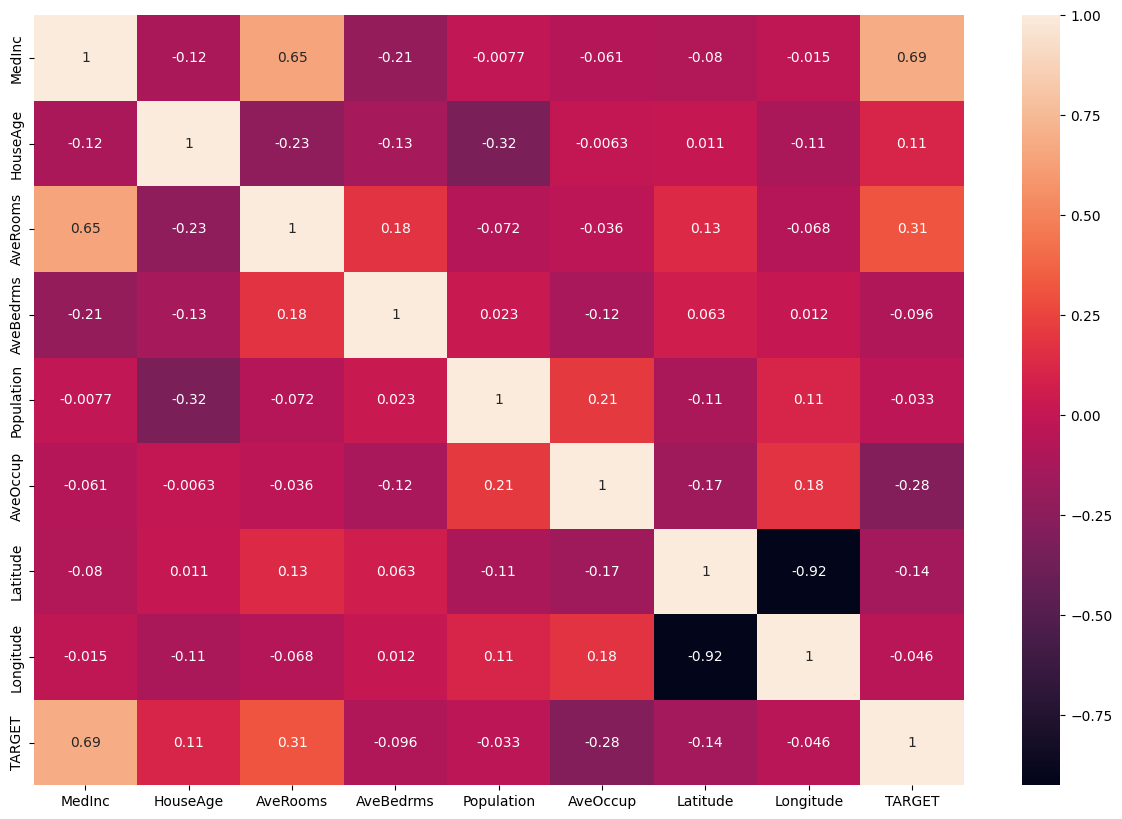

In [186]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# 2. No Multicollineaity

In [187]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'TARGET'],
      dtype='object')

In [188]:
df.columns[2]

'AveRooms'

In [189]:
df.shape

(20640, 9)

In [190]:
df.to_numpy()

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [191]:
for i in range (df.shape[1]-1):
    vif= variance_inflation_factor(df.to_numpy(),i)
    print(f'vif is',vif)

vif is 21.520711293397305
vif is 8.177259479487399
vif is 48.699579524662056
vif is 233.2693823945924
vif is 4.886234794228558
vif is 24.07077274706197
vif is 650.279530723572
vif is 1163.1536420108052


In [192]:
vif_list1 = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f'Vif of {df.columns[i]} >>',vif)
    vif_list1.append(vif)

Vif of MedInc >> 21.520711293397305
Vif of HouseAge >> 8.177259479487399
Vif of AveRooms >> 48.699579524662056
Vif of AveBedrms >> 233.2693823945924
Vif of Population >> 4.886234794228558
Vif of AveOccup >> 24.07077274706197
Vif of Latitude >> 650.279530723572
Vif of Longitude >> 1163.1536420108052


In [193]:
vif_list1

[21.520711293397305,
 8.177259479487399,
 48.699579524662056,
 233.2693823945924,
 4.886234794228558,
 24.07077274706197,
 650.279530723572,
 1163.1536420108052]

In [194]:
x = df.drop("TARGET",axis = 1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,787.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,787.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,787.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,787.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.239697,787.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,787.0,2.123209,39.43,-121.32


In [195]:
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,787.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,787.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,787.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,787.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.239697,787.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,787.0,2.123209,39.43,-121.32,0.847


<Axes: >

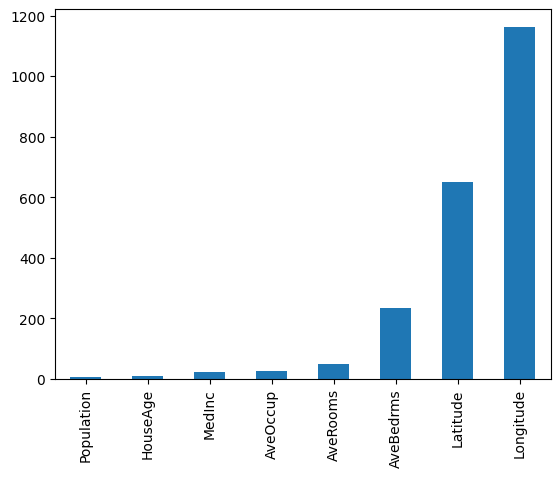

In [196]:
s1= pd.Series(vif_list1,index=x.columns)
s1.sort_values().plot(kind = 'bar')

# Model Training

In [197]:
x= df.drop('TARGET',axis=1)
y=df['TARGET']

In [198]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,787.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,787.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,787.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,787.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.239697,787.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,787.0,2.123209,39.43,-121.32


In [199]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: TARGET, Length: 20640, dtype: float64

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [201]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35
16414,2.6250,16.0,8.333333,1.239697,787.0,3.333333,37.90,-121.24
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35
8589,7.3356,38.0,5.894904,1.057325,787.0,2.388535,33.89,-118.39
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,787.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,787.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [202]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,787.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,787.0,2.512367,33.82,-118.13
...,...,...,...,...,...,...,...,...
2319,2.3173,25.0,4.915289,1.115702,1482.0,3.061983,36.82,-119.70
5341,2.1875,49.0,4.571429,1.000000,787.0,2.000000,34.04,-118.44
16888,5.0480,26.0,5.000000,1.000000,787.0,3.666667,37.60,-122.37
6823,4.8750,42.0,5.347985,1.058608,829.0,3.036630,34.09,-118.10


# Training on Linear Regression 

In [273]:
linear_reg= LinearRegression()
model

LinearRegression()

In [286]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [287]:
linear_reg.coef_

array([ 4.23551894e-01,  1.20833218e-02, -7.33133510e-02,  1.62742004e+00,
        6.02371862e-05, -4.09371094e-01, -4.24331147e-01, -4.13625952e-01])

In [288]:
linear_reg.intercept_

-34.485326497912205

In [289]:
y_test_pred= linear_reg.predict(x_test)
y_test_pred[:10]

array([2.62301148, 1.06234413, 2.26104309, 1.95565628, 2.95652967,
       3.95170439, 3.04444413, 1.87543402, 1.67034151, 1.51239001])

In [290]:
y_test[:10]

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
6636     2.630
17333    2.268
19081    1.662
13298    1.180
7157     1.563
Name: TARGET, dtype: float64

# Evaluation of Testing Data

In [282]:
mse = mean_squared_error(y_test,y_test_pred)
print('mean squared error is ', mse)
print()

rmse=np.sqrt(mse)
print('root mean squared error is ', rmse)
print()

mae = mean_absolute_error(y_test,y_test_pred)
print('mean absolute error is ', mae)
print()

r_squared = r2_score(y_test,y_test_pred)
print('mean squared error is ', r_squared)
print()

mean squared error is  0.45775542244421435

root mean squared error is  0.6765762502809379

mean absolute error is  0.4910443504705267

mean squared error is  0.6510188169026034



# Evaluation of Training Data

In [283]:
y_train_pred=linear_reg.predict(x_train)
y_train_pred[:5]

array([2.19404073, 1.9996095 , 0.97508919, 1.83220605, 4.02758681])

In [284]:
mse=mean_squared_error(y_train,y_train_pred)
print('mean squared error is ', mse)
print()

rmse=np.sqrt(mse)
print('root mean squared error is ',rmse)
print()

mae=mean_absolute_error(y_train,y_train_pred)
print('mean absolute error is ', mae)
print()

r_squared=r2_score(y_train,y_train_pred)
print('r squared error is ', r_squared)
print()

mean squared error is  0.44210995609143766

root mean squared error is  0.6649134951942528

mean absolute error is  0.4900597607082949

r squared error is  0.6691112312215092



In [212]:
row_10=x_train.iloc[10]

In [213]:
row_10

MedInc          3.072600
HouseAge       52.000000
AveRooms        5.233831
AveBedrms       1.189055
Population    787.000000
AveOccup        1.895522
Latitude       32.750000
Longitude    -117.170000
Name: 14015, dtype: float64

In [214]:
y_new10 = linear_reg.predict([row_10])
y_new10

C:\Users\Kirtiraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.83493594])

In [215]:
df['TARGET'][10]

2.815

# Checking Normality Of Residual

In [216]:
residual = y_train - y_train_pred
residual

15961    0.361959
1771    -0.853610
16414    0.399911
5056    -0.644206
8589     0.199413
           ...   
10955    0.621339
17289    0.464981
5192    -0.216305
12172    0.381628
235     -0.741167
Name: TARGET, Length: 16512, dtype: float64

# Normality on QQ plot

In [217]:
import statsmodels.api as sm

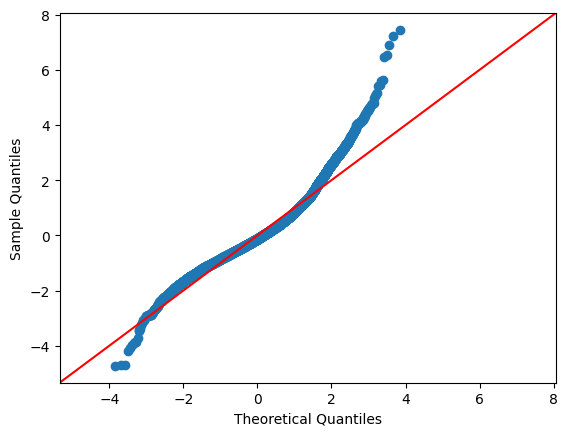

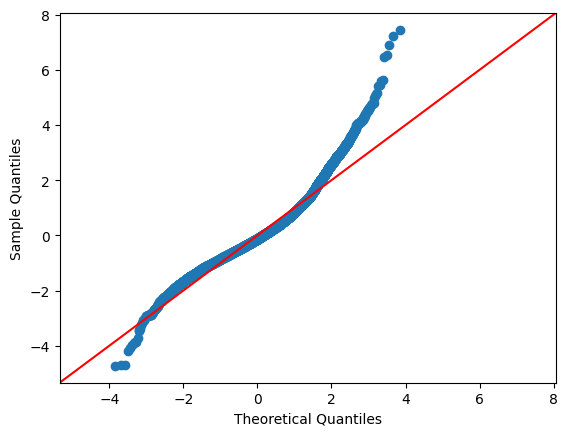

In [218]:
sm.qqplot(residual,line = "45",fit = True)

# Density Plot

<Axes: xlabel='TARGET', ylabel='Density'>

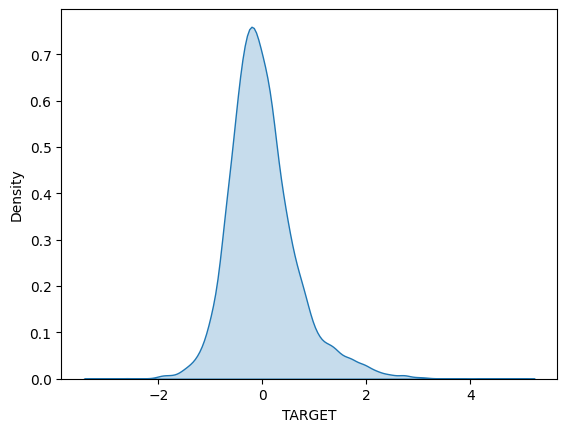

In [219]:
sns.kdeplot(residual,fill=True)

# Assumption of Homoscedasticity

<Axes: xlabel='TARGET', ylabel='TARGET'>

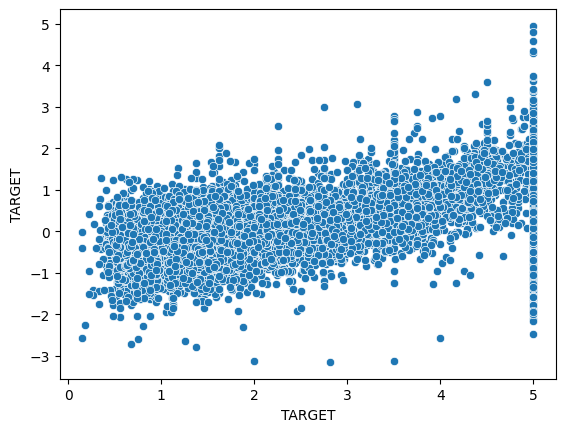

In [220]:
sns.scatterplot(x = y_train,y = residual)

# Training On Regularisation

# 1. Lasso Rrgression

In [221]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [222]:
lasso_model.score(x_train,y_train)

0.28477991167412575

# Training Data Evaluation

In [223]:
lasso_model=Lasso(alpha= 2)
lasso_model.fit(x_train,y_train)

Lasso(alpha=2)

In [224]:
yp_train = lasso_model.predict(x_train)

In [225]:
mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 1.3347851579128924

Root Mean Squared Error : 1.1553290258246316

Mean Absolute Error : 0.9140485915591904

R Squared Value :  0.0010054933161135482


# Testing data Evaluation

In [226]:
yp_test= lasso_model.predict(x_test)

In [227]:
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 1.3119676832651992
RMSE; 1.145411578108585
MAE: 0.9085112864570721
R2_Score: -0.00021105560412482127


# 2.Ridge Regression

In [228]:
ridge_model = Ridge(alpha=2)
ridge_model.fit(x_train,y_train)

Ridge(alpha=2)

# Training Data Evaluation

In [229]:
yp_train= ridge_model.predict(x_train)

In [230]:
mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 0.4421175683498508

Root Mean Squared Error : 0.6649192194168031

Mean Absolute Error : 0.49009057252141075

R Squared Value :  0.6691055339718108


# Testing data Evaluation

In [232]:
yp_test = ridge_model.predict(x_test)

In [233]:
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 0.4575695131083982
RMSE; 0.6764388465400241
MAE: 0.4909980410731633
R2_Score: 0.651160549489004


# Lasso With HYPERPARAMETER TUNNING

In [237]:
lasso_reg_Model = Lasso()
hyperpamaters = {'alpha':np.arange(0.01,5,0.01)}

gscv_lasso = GridSearchCV(lasso_reg_Model,hyperpamaters,cv=5)
gscv_lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [238]:
gscv_lasso.best_estimator_

Lasso(alpha=0.01)

In [239]:
gscv_lasso.best_params_

{'alpha': 0.01}

# USE Alpha = 0.01 For Lasso And Ridge

# 1. Lasso with Alpha =0.01

In [240]:
lasso_model=Lasso(alpha= 0.01)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [241]:
yp_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 0.4559269316571469

Root Mean Squared Error : 0.6752236160392696

Mean Absolute Error : 0.4989988423520462

R Squared Value :  0.6587701792497358


In [242]:
yp_test= lasso_model.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 0.46291035830160254
RMSE; 0.6803751599680888
MAE: 0.49738077814112214
R2_Score: 0.6470888238842865


# 1. Ridge with Alpha =0.01

In [260]:
Ridge_model=Ridge(alpha= 0.01)
Ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [261]:
yp_train = Ridge_model.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 0.4421099562912509

Root Mean Squared Error : 0.6649134953445078

Mean Absolute Error : 0.4900598971097025

R Squared Value :  0.6691112310719628


In [262]:
yp_test= Ridge_model.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 0.4577544320771619
RMSE; 0.6765755183844313
MAE: 0.49104408676167377
R2_Score: 0.6510195719334533


# Training And Testing Evaluation For Linear regression,Lasso & Ridge

In [263]:
Training_Result = pd.DataFrame({'Linear Regression': [0.4421,0.6649,0.4900,0.6691],
                                'Lasso Regression' : [0.4421,0.6752,0.4989,0.6587],
                                'Ridge Regression' : [0.4421,0.6649,0.4900,0.6691]}
                                ,index=['MSE','RMSE','MAE','R2_Score'])
Training_Result

,Linear Regression,Lasso Regression,Ridge Regression
MSE,0.4421,0.4421,0.4421
RMSE,0.6649,0.6752,0.6649
MAE,0.4900,0.4989,0.4900
R2_Score,0.6691,0.6587,0.6691


In [264]:
Testing_Result = pd.DataFrame({'Linear Regression':  [0.4577,0.6765,0.4910,0.6510],
                                'Lasso Regression' : [0.4629,0.6803,0.4973,0.6470],
                                'Ridge Regression' : [0.4577,0.6765,0.4910,0.6510]}
                                ,index=['MSE','RMSE','MAE','R2_Score'])
Testing_Result

,Linear Regression,Lasso Regression,Ridge Regression
MSE,0.4577,0.4629,0.4577
RMSE,0.6765,0.6803,0.6765
MAE,0.4910,0.4973,0.4910
R2_Score,0.6510,0.6470,0.6510


# Create Pickle File

In [270]:
import pickle

In [291]:
with open("California_Kirtiraj.pkl",'wb') as f:
    pickle.dump(linear_reg,f)